# 1. Introduction to Data Exploration

<br>
<center>
<img src="https://files.realpython.com/media/Correlation-in-NumPy-and-Correlation-in-Pandas_Watermarked.69b8c063482f.jpg">
</center>


# 1. Introduction to Data Exploration

## 1.1. Philosophy
--- 


- Data **Exploration** is time consuming and often overlooked
- Often times, people tend to jump straight to modelling


---
Table of Contents:
1. Understand the **problem**
    - **Meaning and importance** of each variable
2. **Univariate** study
    - **Focusing** on the target `SalePrice`
    - Looking for variables **related** to `SalePrice`
3. **Multivariate** study
    - **Interactions** between `SalePrice` and chosen variables
    - Finding other **relevant** variables, **undirectly** related to `SalePrice`
4. Investigating initial **requirements**
    - What is the **overall picture** of the houses we are looking for?
5. Finding the **right house**
    - Finding the **best quality-price** relation within budget

# 1. Introduction to Data Exploration

## 1.2. Setting up
--- 

- We are going to use a **plotting** library called `seaborn`

To install it:

In [ ]:
!pip install seaborn

---
- `pandas` and `numpy`

In [3]:
import pandas as pd
import numpy as np

---
- Plotting packages
    - `matplotlib`
    - `seaborn`

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


---
- Loading data

In [5]:
df = pd.read_csv('../data/housing_data.csv')

--- 
- Loading the feature description function

In [6]:
def feature_description(search_feature):
    PATH = '../data/data_description.txt'
    with open(PATH, 'r') as fp:
        file_content = fp.read()
    feature_text = file_content.split('\n\n')
    for text in feature_text:
        first_word = text.split(' ')[0]
        if search_feature in first_word:
            print(text)
            return
feature_description("Alley")

Alley: Type of alley access to property
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access


# 1. Introduction to Data Exploration

## 1.3.  The Problem
--- 

We want to buy our dream-house in Boston! But the Internet is full of ads, and house offers, and we don't know where to start looking.

Moreover, house sellers are usually a little shady, and try to rip us off for a bigger comission.

Little do they know, that we are able of performing the fine arts of **Mathematics** and **Data Visualization**.

These tools will help us discerning how the **house features** are related to the house **price** - our ultimate goal.

We want to get the **best price** for our house, while on a tight budget.

We have some house qualities that we look for, when buying our dream-house:
- Garage
- Fireplace
- Living room with kitchen
- Garden space
- etc.


---
We'll have to understand:
- how the qualities we want relate to the price (how far can we go?)
- if a neighborhood is overpriced or not
- if a certain seller usually overprices the house
- if a desired quality is out of reach of our budget
- etc.

# 1. Introduction to Data Exploration

## 1.4.  Philosophy on Data Exploration
--- 

- Jumping in directly to see what we have on the menu, we have a lot of variables
- We know that our target is `SalePrice` - the final price of the house
- How can we start researching, without knowing where to start?

In [7]:
print(len(df.columns))
df.columns

81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

---
- We will have to look at each one of 81 variables!
    - Understand their **meaning and importance**
- **Time-consuming** task, but we can focus our research


--- 
- We need to create a **uniform** method for our analysis
- This allows a **standardized** way to share our results with a **client**, and even our **future selves**
- **Document** conclusions, before they get lost!

# 1. Introduction to Data Exploration

## 1.5.  Taking notes
--- 
- Here is a suggestion **method**. Each variable has the following information:
    1. Variable **Name**
    2. Variable **Type**
    3. Variable **segment** (semantic group)
    4. Variable **expectation**
    5. Conclusions
    6. Comments


--- 
### Variable Name
- Self explanatory


---
### Variable Type

- **NOT** Python **types**
- More general description 
- Can be either
    - Numerical
    - Categorical - values are categories (i.e. Low, Medium, High)


In [8]:
df['MSZoning'].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

---
### Variable Segment

- We can divide variables into a semantic group
- A group that makes sense to us, as a Data Scientist
- According to this problem and data that we are given, we can define three segments:
    1. Building - physical qualities of the house (i.e. `OverallQual`)
    2. Space - space that the house takes (i.e. `TotalBsmtSF`)
    3. Location - where it is located (i.e. `Neighborhood`)

In [9]:
df[['OverallQual', 'TotalBsmtSF', 'Neighborhood']].head()

,OverallQual,TotalBsmtSF,Neighborhood
0,7,856,CollgCr
1,6,1262,Veenker
2,7,920,CollgCr
3,7,756,Crawfor
4,8,1145,NoRidge


---
### Variable Expectation
- Expected influence at **first glance**, on `SalePrice` (the objective(
- Options:
    1. Number scale (i.e. 1 to 10)
    2. Categorical scale (i.e. `Low`, `Medium`, `High`)
- Our _6th sense_
- Questions to ask:
    1. Do I think of this variable when buying a house?
    2. If so, how important would this variable be?
    3. Is this information contained in other variables?


---
### Conclusions
- **De facto importance** of the variable
- We can have the **same scale** as expectation
- Correction of our **expectation**

---
### Comments
- Any **additional observation** on this variable
    - **Interactions** with other variables
    - **Indirect** influence

# 2. Plotting and Data Overview

<center>
    <img src="https://files.realpython.com/media/Python_Plotting_With_Matplotlib_Watermark.610acdacc476.jpg">
</center>

# 2. Plotting and Data Overview

## 2.1. Out first plot - Scatter
---


- Collection of points placed on Cartesian Coordinates
- Displays values from two variables

### Looks
<center>
    <img src="https://datavizcatalogue.com/methods/images/top_images/scatterplot.png">
</center>

### When to use

- **Paired** numerical data 
- Check if one variable **impacts** the other
- Can detect **relationships or correlations** between the two variables

---
- Checking the relationship between `GrLivArea` and `SalePrice`

In [10]:
feature_description('GrLivArea')

GrLivArea: Above grade (ground) living area square feet


In [11]:
var = 'GrLivArea'
data = df[['SalePrice', var]]
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


---
- The `seaborn` package has a function called `scatterplot`
- You can do a `Scatter Plot` by doing `sns.scatterplot(data, x, y)`
- The **function** takes three arguments:
    - The data - our `pd.DataFrame`
    - `x` - what variable should we put on the **x** axis
    - `y` - what variable should we put on the **x** axis

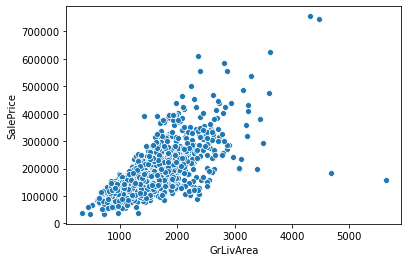

In [12]:
sns.scatterplot(data=data, x=var, y='SalePrice')

---
Taking notes:
- **Name**: `GrLivArea`
- **Type**: `Numeric`
- **Segment**: `Space`
- **Expectation**: `High`
- **Conclusions**:
- **Comments**: 
    - `SalePrice` seems to increase with `GrLivArea`
    - Some weird points (outliers), out of the cloud
    - Spreads as both values increase

- Put the code in a function, so we can use it later

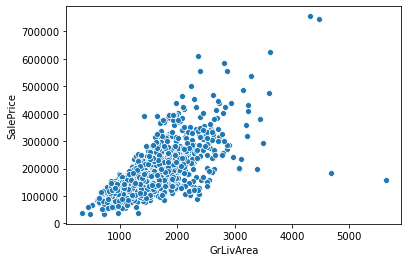

In [13]:
def scatter(df, var):
    data = df[['SalePrice', var]]
    return sns.scatterplot(data=data, x=var, y='SalePrice')
scatter(df, 'GrLivArea')

# 2. Plotting and Data Overview

## 2.2. Exercise - Exploring Relations to `SalePrice`
---

- Let's have a first look at our **numeric** variables.
- Look for relations and correlations between the variable and `SalePrice`
- Take notes on the variable
- **`[OBJECTIVE]`**: Finding 5 variables that are **expected** to have a `HIGH` influence

---
- Selecting variables with `Numeric` dtype
- **`[GOOGLE]`**: Search for `pandas select numeric columns`

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

sub_df = df.select_dtypes(include=numerics)
sub_df = sub_df.drop(['Id'], axis=1)
print(len(sub_df.columns))
sub_df.columns

37


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

---
- Dividng in groups of 3

In [15]:
col_groups = []
for i in range(0, 37-3, 3):
    cols = sub_df.columns[i:i+3]
    col_groups.append(cols)
col_groups

[Index(['MSSubClass', 'LotFrontage', 'LotArea'], dtype='object'),
 Index(['OverallQual', 'OverallCond', 'YearBuilt'], dtype='object'),
 Index(['YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'], dtype='object'),
 Index(['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], dtype='object'),
 Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], dtype='object'),
 Index(['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'], dtype='object'),
 Index(['FullBath', 'HalfBath', 'BedroomAbvGr'], dtype='object'),
 Index(['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], dtype='object'),
 Index(['GarageYrBlt', 'GarageCars', 'GarageArea'], dtype='object'),
 Index(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], dtype='object'),
 Index(['3SsnPorch', 'ScreenPorch', 'PoolArea'], dtype='object'),
 Index(['MiscVal', 'MoSold', 'YrSold'], dtype='object')]

In [16]:
import sys
import os
sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr

- Plotting groups of 3 variables

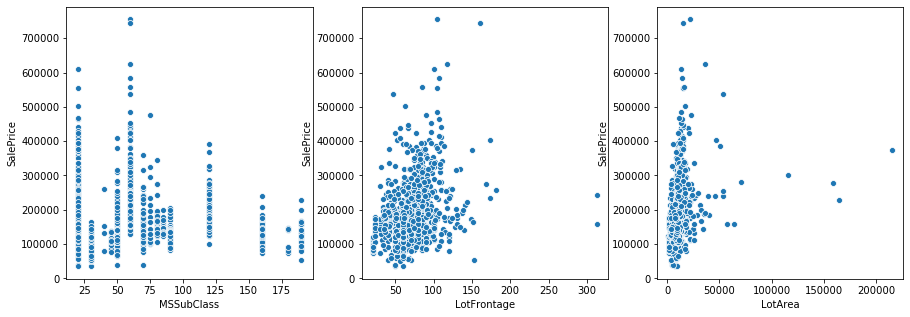

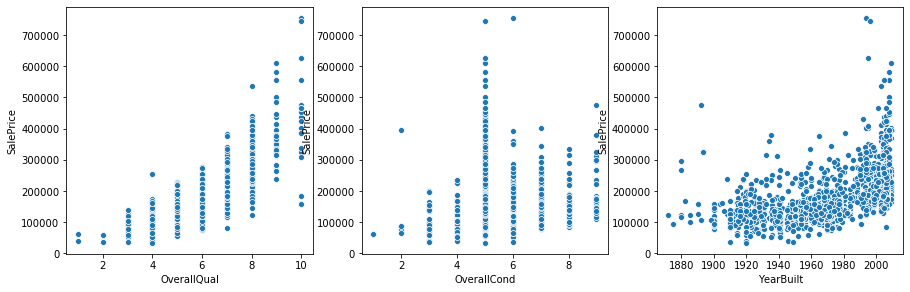

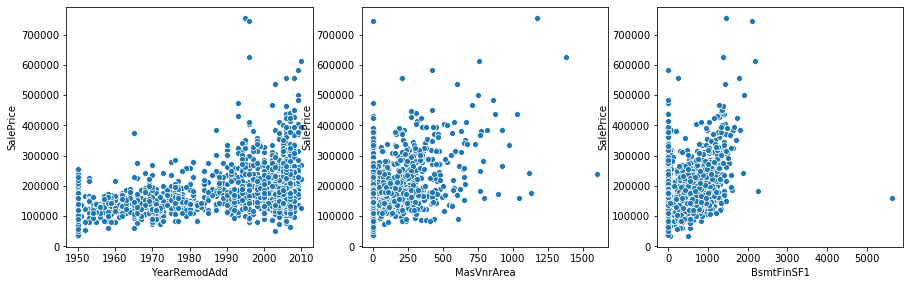

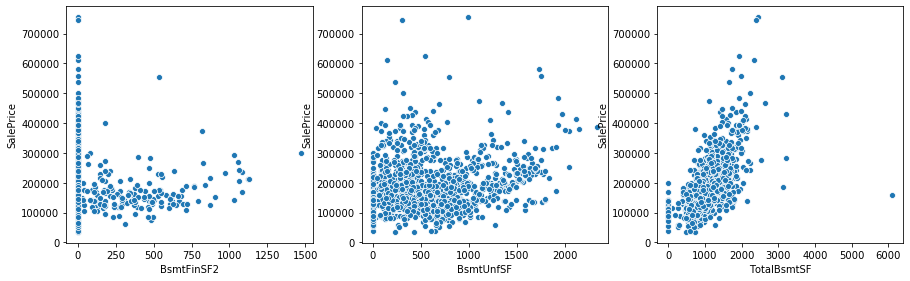

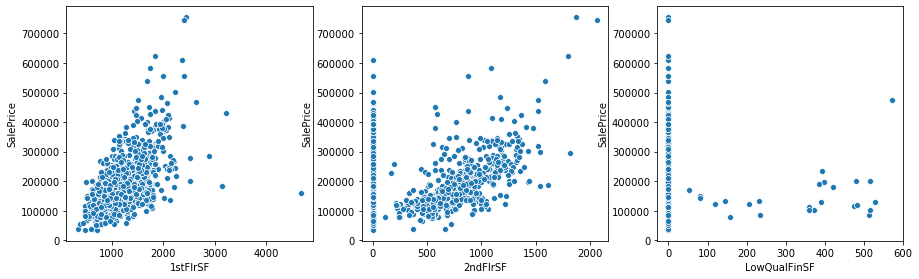

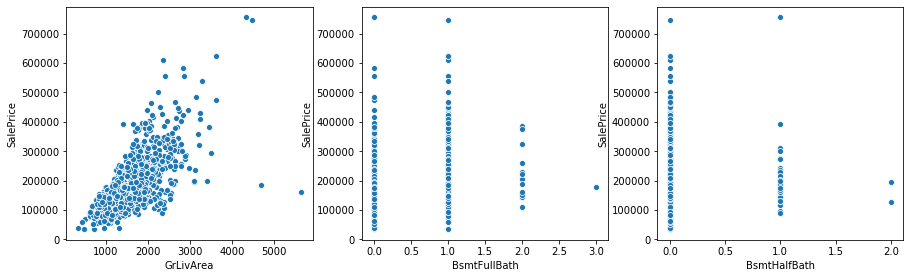

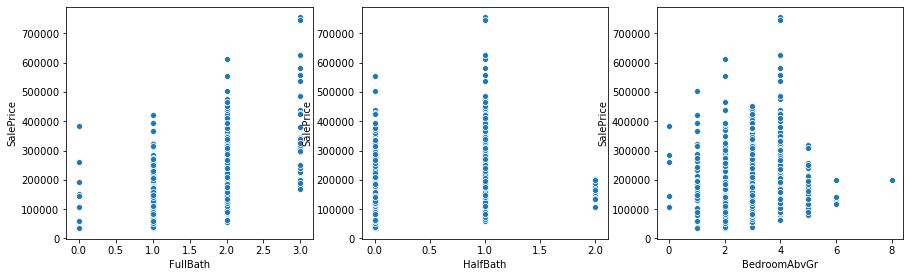

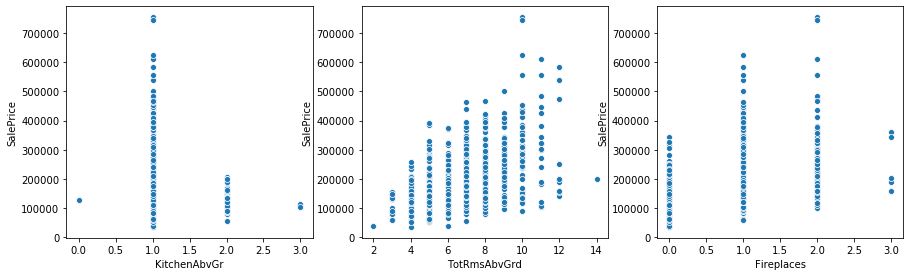

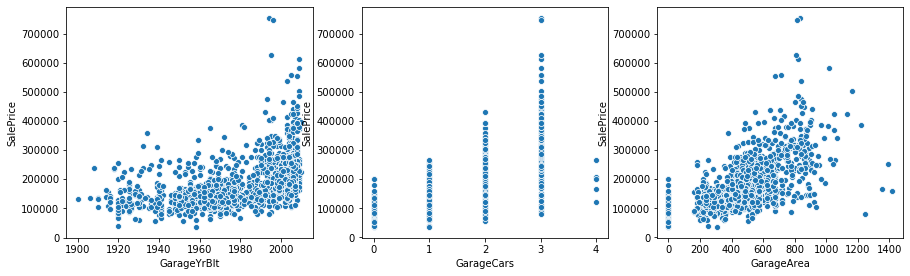

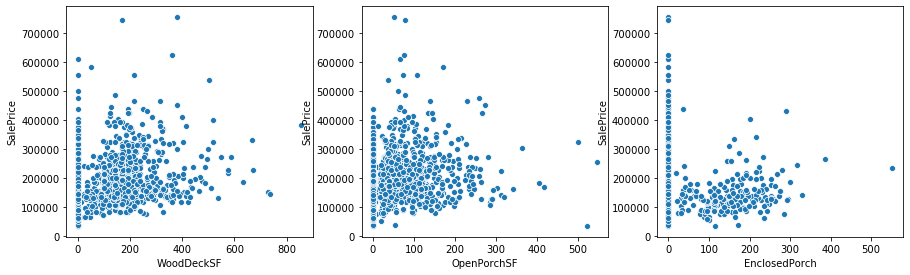

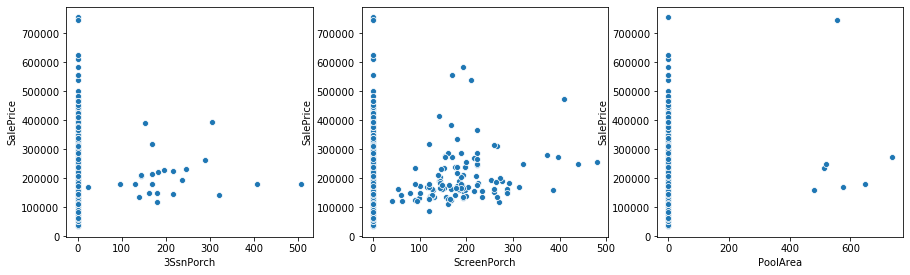

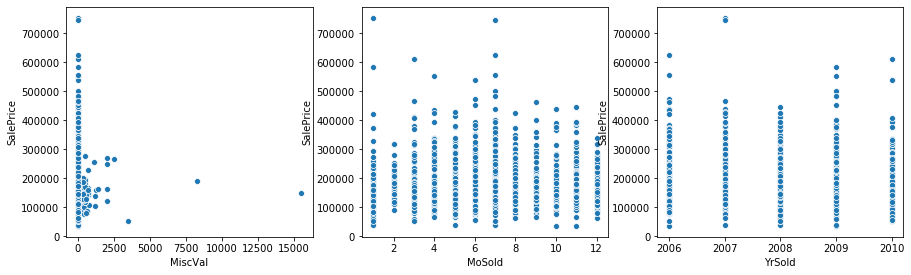

In [17]:
for i, cols in enumerate(col_groups):
    plt.subplots(figsize=(15, 5*(i+1)))
    for j, c in enumerate(cols):
        plt.subplot(i+1, 3, j+1)
        f = scatter(df, c)
    plt.show()


# 2. Plotting and Data Overview

## 2.3. Conclusions
---

I went through this process and concluded that the following variables can play an important role in this problem (`HIGH` expectation):

- `Building` variables:
    - `OverallQual`
    - `YearBuilt`
- `Space` variables:
    - `TotalBsmtSF`
    - `GrLivArea`
    - `1stFlrSf`


---
- We only analyzed `Numerical` variables though
- We need another strategy for `Categorical` variables
- The main point was to build expectations on our `Numerical` variables

# 3. Investigating Categorical Data

<center>
<img src="https://files.realpython.com/media/Python_Histograms_Watermark.c4daed2c983b.jpg">    
    </center>

# 3. Investigating Categorical Data

## 3.1 New Plot - `BoxPlot`
---

- Convenient way of visually displaying the data distribution through their quartiles. 
- **`[QUARTILE]`**: a type of **quantile** which divides the number of data points into four more or less equal parts, or **quarters**.
  
    <center>
      <img src="https://datavizcatalogue.com/methods/images/anatomy/box_plot.png">
  </center>

     <center>

    <img src="https://miro.medium.com/max/16200/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="50%">
  </center>

   


### How to interpret

- Lines extending parallel from the boxes are known as the “whiskers”
    - indicate variability outside the upper and lower quartiles
- Outliers are plotted as individual dots that are in-line with whiskers

### When to use

- Know what the key values are, such as: 
    - median
    - values in 50% of data
    - minimum and maximum at 99.7% data
- Check outliers and what their values are.
- Is the data symmetrical?
- How tightly is the data grouped.
- If the data is skewed and if so, in what direction.

# 3. Investigating Categorical Data

## 3.2. An example
---

- If we look at `OverallQual` description, we can see that the variable is in reality `Categorical`

In [18]:
feature_description('OverallQual')

OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor


In [19]:
df['OverallQual'].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [20]:
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

---
- The `seaborn` package comes with a `sns.boxplot` **function**
- Similarly to `sns.scatterplot`, we have to provide **data**, **x** and **y** variables

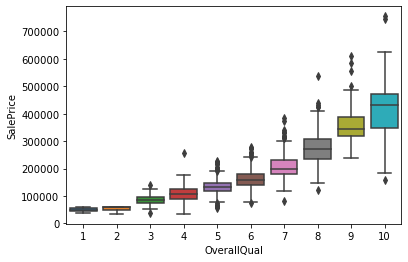

In [21]:
var = 'OverallQual'
data = df[['SalePrice', var]]
sns.boxplot(data=data, x=var, y="SalePrice")

---
- Putting it in a function for later use

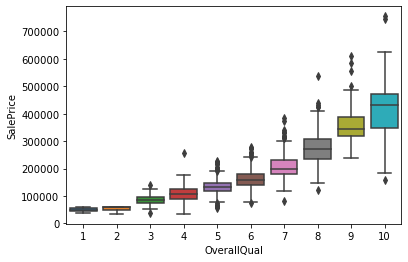

In [22]:
def boxplot(df, var):
    data = df[['SalePrice', var]]
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    return fig
boxplot(df, 'OverallQual')

# 3. Investigating Categorical Data

## 3.3. Investigating `Categorical` variables
---

- As we did for `Numericals` we will do for `Categoricals`
- This time around with `BoxPlot`
- Select `Categorical` dtypes (`object`)

In [23]:
categorical = ['object']

sub2_df = df.select_dtypes(include=categorical)
print(len(sub2_df.columns))
sub2_df.columns

43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

---
- Divide in groups of 3

In [70]:
col_groups2 = []
for i in range(0, 43, 3):
    cols = sub2_df.columns[i:i+3]
    col_groups2.append(cols)
col_groups2

[Index(['MSZoning', 'Street', 'Alley'], dtype='object'),
 Index(['LotShape', 'LandContour', 'Utilities'], dtype='object'),
 Index(['LotConfig', 'LandSlope', 'Neighborhood'], dtype='object'),
 Index(['Condition1', 'Condition2', 'BldgType'], dtype='object'),
 Index(['HouseStyle', 'RoofStyle', 'RoofMatl'], dtype='object'),
 Index(['Exterior1st', 'Exterior2nd', 'MasVnrType'], dtype='object'),
 Index(['ExterQual', 'ExterCond', 'Foundation'], dtype='object'),
 Index(['BsmtQual', 'BsmtCond', 'BsmtExposure'], dtype='object'),
 Index(['BsmtFinType1', 'BsmtFinType2', 'Heating'], dtype='object'),
 Index(['HeatingQC', 'CentralAir', 'Electrical'], dtype='object'),
 Index(['KitchenQual', 'Functional', 'FireplaceQu'], dtype='object'),
 Index(['GarageType', 'GarageFinish', 'GarageQual'], dtype='object'),
 Index(['GarageCond', 'PavedDrive', 'PoolQC'], dtype='object'),
 Index(['Fence', 'MiscFeature', 'SaleType'], dtype='object'),
 Index(['SaleCondition'], dtype='object')]

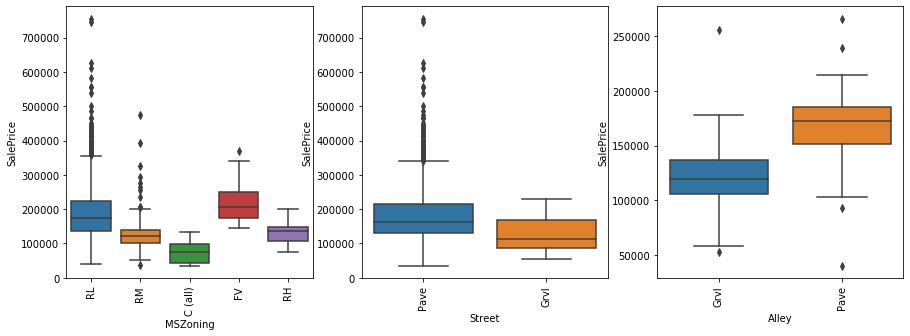

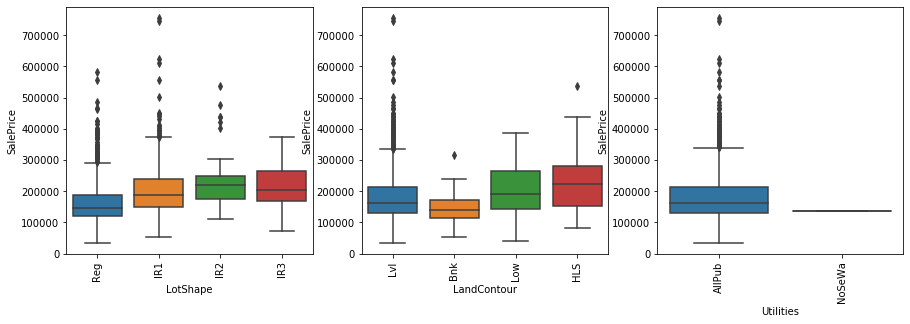

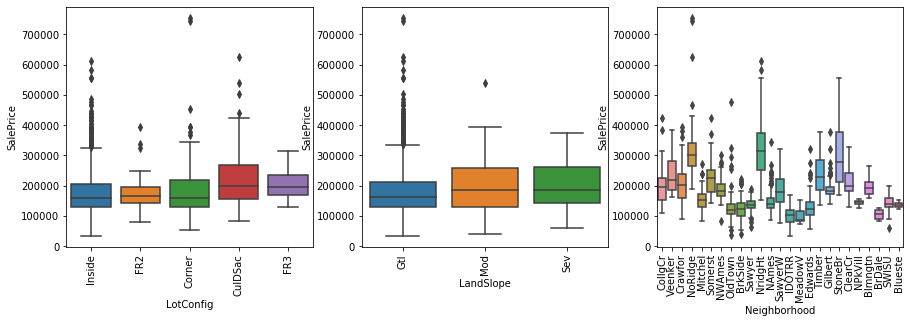

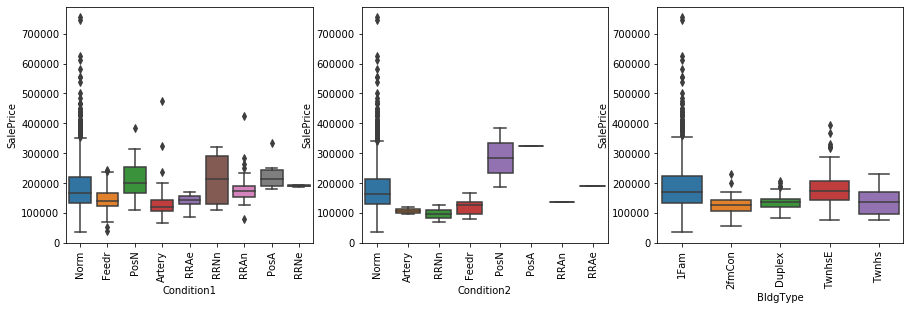

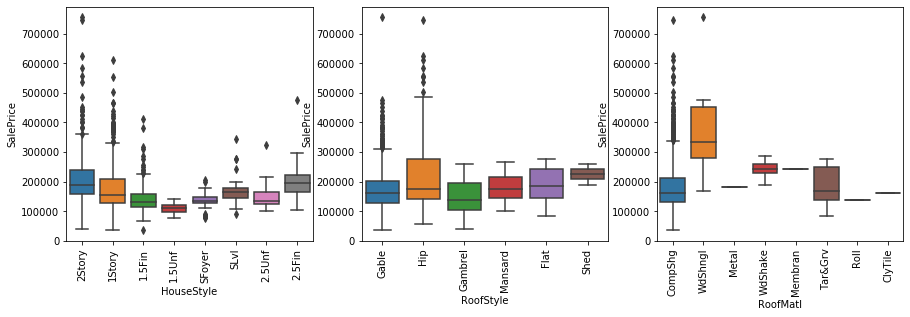

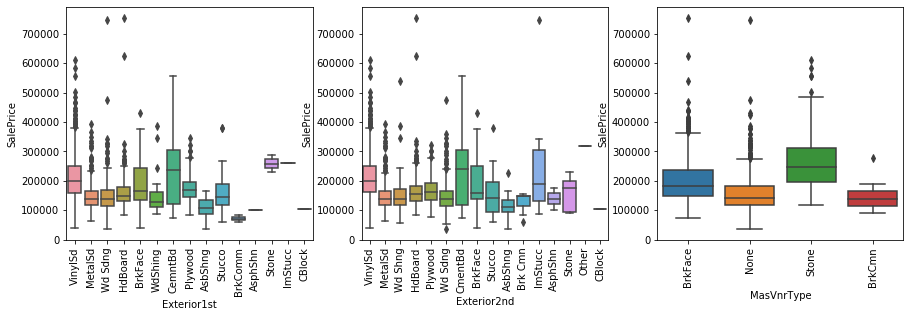

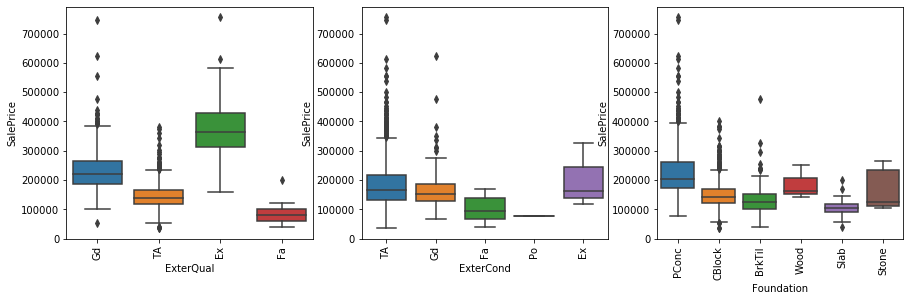

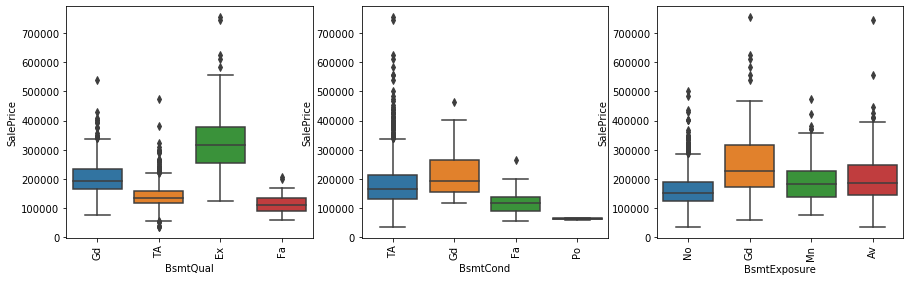

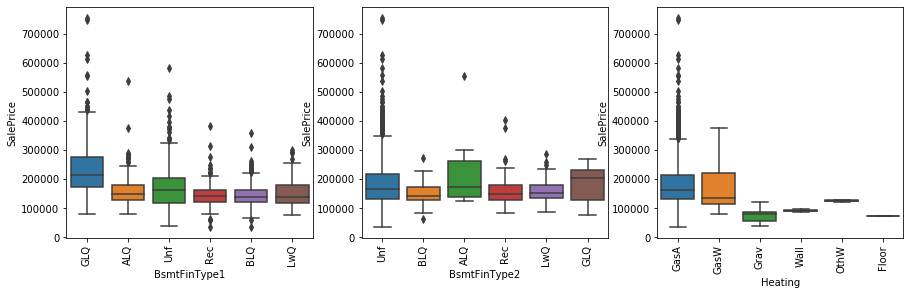

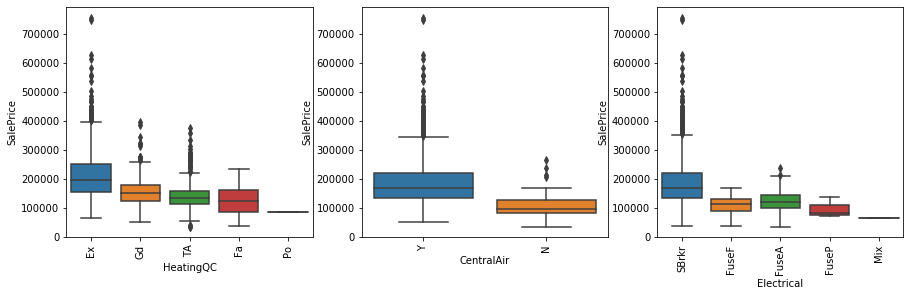

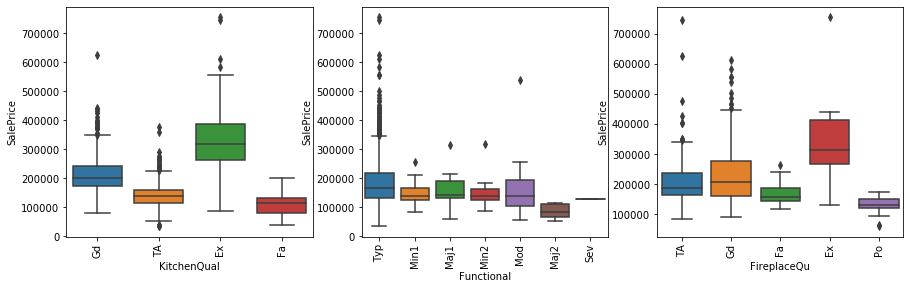

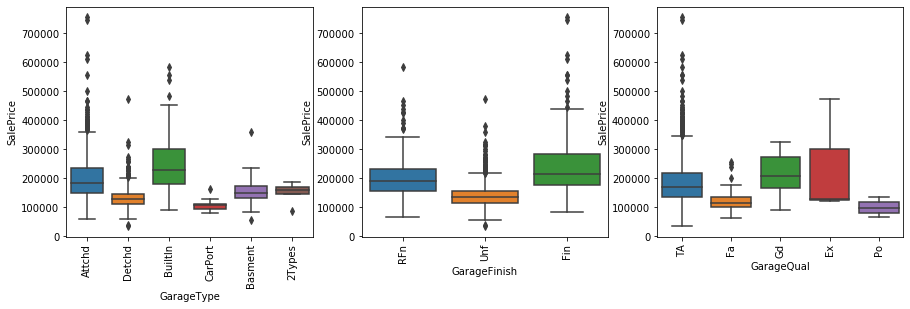

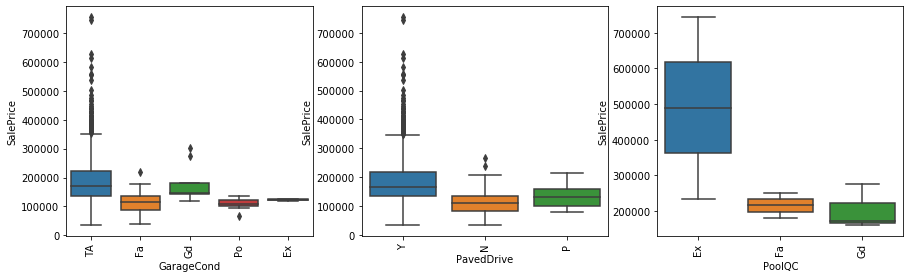

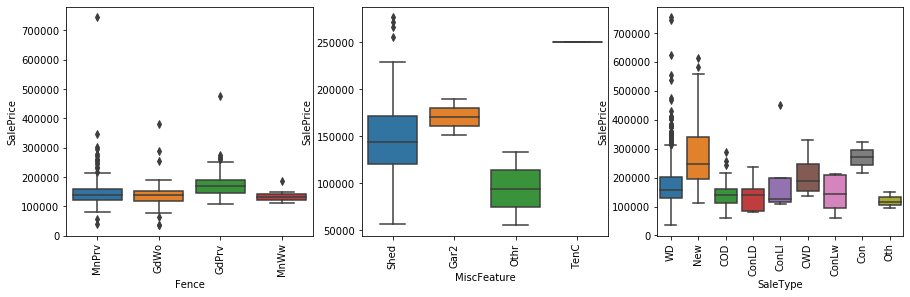

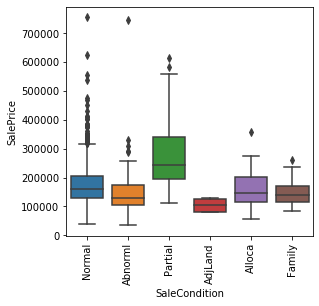

In [74]:
for i, cols in enumerate(col_groups2):
    plt.subplots(figsize=(15, 5*(i+1)))
    for j, c in enumerate(cols):
        plt.subplot(i+1, 3, j+1)
        plt.xticks(rotation=90)
        f = boxplot(df, c)
    plt.show()


# 3. Investigating Categorical Data

## 3.4. Conclusions
---

- Even though we can see some categories which tend to have an higher price:
    - Variable as a whole is not expressive (low to medium expectation)
    - Lots of outliers
- I'd rather trust the **linear** relationships of previous variables

# 4. Investigating the target `SalePrice`

<center>
    <img src="https://files.realpython.com/media/Python-Data-Science_Watermarked.2789459dd138.jpg">
    </center>

# 4. Investigating the target `SalePrice`

## 4.1. The overall picture
---

- `SalePrice` is the **target** of our research
- **`[OBJECTIVE]`**: Getting the better price for our dream-home



---
- We want to find out
    - the **relationships** of our target to other variables (*close friends*)
    - shape and behavior of `SalePrice`
    - what influences the `SalePrice` the most
- Overall **statistics** are a great way to start

# 4. Investigating the target `SalePrice`

## 4.2. Pandas Statistics
---

- Just like `numpy`, `pandas` is also capable of calculating statistics
- The way of calculating the statistics is the same
- We **select** a **column** and use `pd.DataFrame.mean()` to get the **mean**

In [12]:
df['SalePrice'].mean()

180921.19589041095

---
- We can use `pd.DataFrame.describe()` to have an overall picture of the whole dataset

In [75]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


---
- We can also do it for just **one column**

In [11]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

---
- Minimum price is greater than 0
    - Good, means data is clean
- Mean is closer to the minimum than to the maximum

# 4. Investigating the target `SalePrice`

## 4.3. Distribution
---

- We can look at the distribution of a variable to get a visual sense of it's spread
- How are values **populated** around the mean?
- Does the distibution have long tails?

<center>
    <img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=50%>
    </center>

- Calculating **distributions** is a **very HARD** problem
- But we have alternatives

# 4. Investigating the target `SalePrice`
## 4.4. New plot - `Histogram`
---

### Looks
<center> 
    <img src="https://datavizcatalogue.com/methods/images/anatomy/histogram.png">
    </center>

### How to interpret

- Visualises the **distribution** of data over a **continuous** or **discrete** interval
- Each bar in a `Histogram` represents the frequency at each interval/bin
- For instance:
    - First bin: `[0, 10[`
    - Second bin: `[10, 20[`

### When to use

- Give an estimate as to where values are **concentrated**
- **Extremes** and **gaps** or **unusual** values
- They are also useful for giving a **rough view** of the probability distribution. 



# 4. Investigating the target `SalePrice`
## 4.5. `Histogram` example
---
- We can use Seaborn's `sns.distplot` to look at the `Histogram`
- We can define the number of **bins** we want to divide our data in

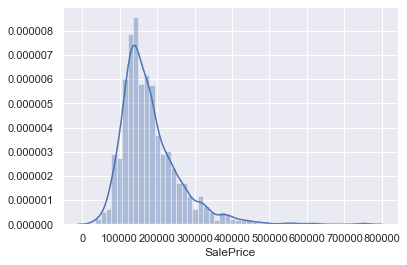

In [61]:
sns.distplot(df['SalePrice'], bins=50)

---
**Conclusions**:
- **Deviates** from the normal distribution
- Has positive **skewness**
- **Peakedness** around the mean


# 4. Investigating the target `SalePrice`

## 4.5. Relations to picked variables
---

- In a jungle of data we **must pick our battles**!
- We should always start with the **main culprits**, and afterwards look for **other suspects**
- For now main culprits are:
    - `GrLivArea`
    - `TotalBsmtSF`
    - `OverallQual`
    - `Yearbuilt`
    - `1stFlrSF`

- Let's focus attention on these variables

# 4. Investigating the target `SalePrice`

## 4.5.1 `GrLivArea`
---


In [87]:
feature_description('GrLivArea')

GrLivArea: Above grade (ground) living area square feet


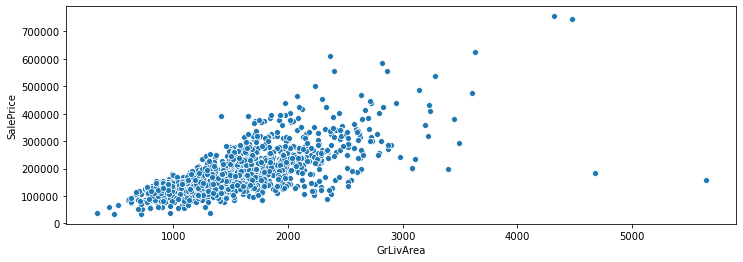

In [93]:
plt.subplots(figsize=(12, 4))
scatter(df, 'GrLivArea')

---
Taking notes:
- **Name**: `GrLivArea`
- **Type**: `Numeric`
- **Segment**: `Space`
- **Expectation**: `High`
- **Conclusions**:
- **Comments**: 
    - `SalePrice` has a **linear relationship** with `GrLivArea`
    - Both seem **positively correlated**
    - Some weird points (outliers), out of the cloud
    - Spreads as both values increase


# 4. Investigating the target `SalePrice`

## 4.5.2 `TotalBsmtSF`
---


In [90]:
feature_description('TotalBsmtSF')

TotalBsmtSF: Total square feet of basement area


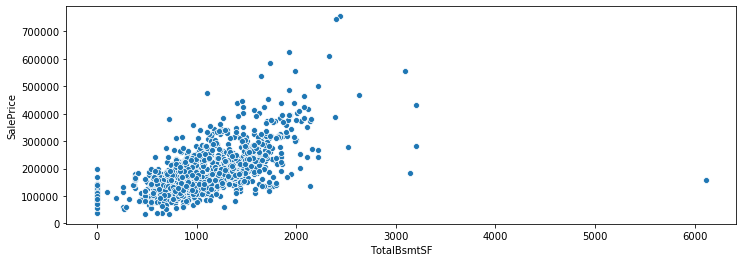

In [94]:
plt.subplots(figsize=(12, 4))
scatter(df, 'TotalBsmtSF')

---
Taking notes:
- **Name**: `TotalBsmtSF`
- **Type**: `Numeric`
- **Segment**: `Space`
- **Expectation**: `High`
- **Conclusions**:
- **Comments**: 
    - `SalePrice` has a **linear relationship** with `TotalBsmtSF`, but more suave
    - Sometimes, the linear relation shoots up (exponentially?)
    - Both seem **positively correlated**, although less than `GrLivArea`
    - Some weird points (outliers), out of the cloud
    - Spreads as both values increase
    - More _noisy_ than `GrLivArea` 


# 4. Investigating the target `SalePrice`

## 4.5.3. `OverallQual`
---

In [97]:
feature_description('OverallQual')

OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor


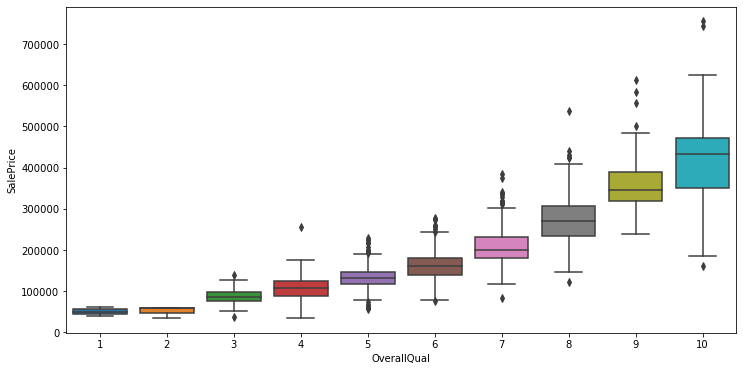

In [96]:
plt.subplots(figsize=(12, 6))
boxplot(df, 'OverallQual')

---
Taking notes:
- **Name**: `OverallQual`
- **Type**: `Numeric`
- **Segment**: `Building`
- **Expectation**: `High`
- **Conclusions**:
- **Comments**: 
    - `SalePrice` seems to enjoy `OverallQual`
    - Makes sense, more quality means higher price
    - **`[NOTE]`**: As quality gets higher, it is also shows more **variability**

# 4. Investigating the target `SalePrice`

## 4.5.4. `YearBuilt`
---

In [102]:
feature_description('YearBuilt')

YearBuilt: Original construction date


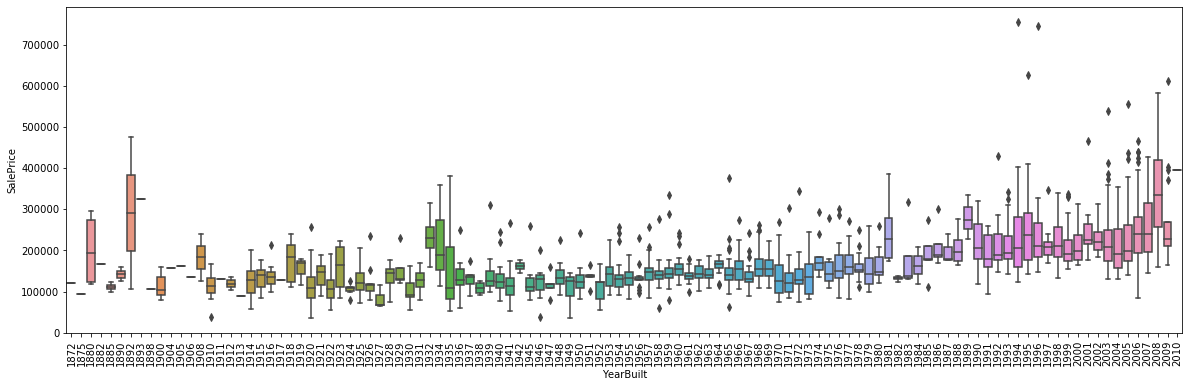

In [101]:
plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90)
boxplot(df, 'YearBuilt', x_size=20)

---
Taking notes:
- **Name**: `YearBuilt`
- **Type**: `Numeric`
- **Segment**: `Building`
- **Expectation**: `High`
- **Conclusions**:
- **Comments**: 
    - We don't see a clear tendency
    - I'd say that you'd rather spend more money in a new house rather than an old one
    - **`[NOTE]`**: We don't know if `SalePrice` takes inflation into account (if it is not it's hard to compare over the years)

# 4. Investigating the target `SalePrice`

## 4.5.5. `1stFlrSF`
---

In [103]:
feature_description('1stFlrSF')

1stFlrSF: First Floor square feet


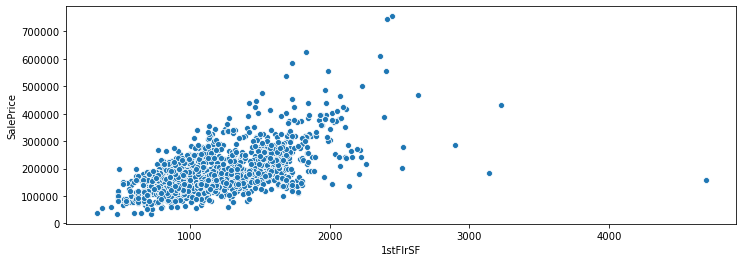

In [104]:
plt.subplots(figsize=(12, 4))
scatter(df, '1stFlrSF')

---
Taking notes:
- **Name**: `YearBuilt`
- **Type**: `Numeric`
- **Segment**: `Space`
- **Expectation**: `High`
- **Conclusions**:
- **Comments**: 
    - Looks a lot like `GrLivArea`
    - It is just a _proxy_ variable - it's information is contained in `GrLivArea`

# 4. Investigating the target `SalePrice`

## 4.6. Summary

- `GrLivArea` and `TotalBsmtSF` are **linearly related** to `SalePrice` - both positive
- Slope for `TotalBsmtSF` is higher than `GrLivArea` (increases faster)
- `OverallQual` is also an extremely good indicator of `SalePrice`
- `YearBuilt` is a more shady case, since we don't know how `SalePrice` changed over the years
- `1stFlrSF` seems to be just a **proxy** of `GrLivArea`
- We have only looked extensively at 5 variables
- Next section we are going to learn a trick to further focus our research


# 5. Further analysis - Working Smart

<br>
<center>
    <img src="https://files.realpython.com/media/Descriptive-Statistics-in-Python_Watermarked.fec81e9a41f9.jpg">
</center>

# 5. Further analysis - Working Smart
## 5.1. Introduction
---


- We looked at variables we **thought** were relevant
    - They had a linear relationship with `SalePrice`
    - **But**, can be **subjective** and has no numerical basis!
- We can look for linear relations **objectively** - with **correlations**!


--- 
Plan:
1. Investigate **correlation matrix** (every feature vs every feature)
2. `SalePrice` **correlation matrix**
3. **Scatter plots** between correlated variables


# 5. Further analysis - working smart
## 5.2. Correlation
---
- **`[CORRELATION]`**: a mutual relationship or connection between two random variables
    - Commonly refers to the degree to which a pair of variables are **linearly related**
    - Indicate a **predictive relationship** that can be exploited in practice
    - Normally come between **[-1, 1]**

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png">
    </center>


---
- One of the most used correlations is the **Pearson** correlation index
    - Sensitive only to a **linear relationship** between two variables
    
$$ r_{x,y}=\frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2\sum(y_i - \bar{y})^2}} $$

- **Pandas** allows calculating correlations by using `pd.DataFrame.corr()`

In [86]:
corrmat = df.corr(method='pearson')
corrmat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


- **`[NOTE]`**: `Categorical` features were automatically dropped from calculations
    - One cannot calculate correlations between `Categorical` variables (at least, directly)

---
- Viewing a `pd.DataFrame` with numbers doesn't help us a lot
- We will need an `Heatmap` to help us visualize this

# 5. Further analysis - working smart
## 5.3. New plot - `Heatmap`
---

- `Heatmaps` visualise data through **variations in colouring**
- Useful for cross-examining **multivariate data**
    - By placing variables in rows and columns 
    - Colouring the cells within the table


### Looks

<center>
      <img src="img/heatmap1.png" width="30%">
   </center>


### How to interpret

- Legend is required
- Numerical data is **color coded** - we need to know the **ranges**
- The palette of colors is called - **colormap**
- Can be **continuous** or **discrete**
 

<center>
    <img src="img/heatmap3.png" width="30%">
  </center>

### When to use

- Good for showing **variance** across multiple variables, revealing any **patterns**
    - Any variables are **similar** to each other?
    - **Correlated** variables?


# 5. Further analysis - working smart
## 5.4. Example - Correlation `Heatmap`
---

- We already have a (square) **table** of **correlated** variables
- We can make use of `sns.heatmap` to produce an `Heatmap`

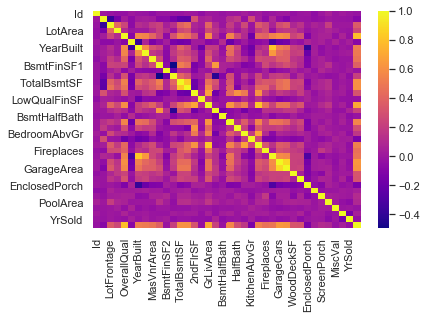

In [95]:
corrmat = df.corr()
sns.heatmap(corrmat, cmap='plasma')

--- 
- Put it in a function and making the size bigger
- Let's investigate variables of **interest** - **high** or **low** correlations

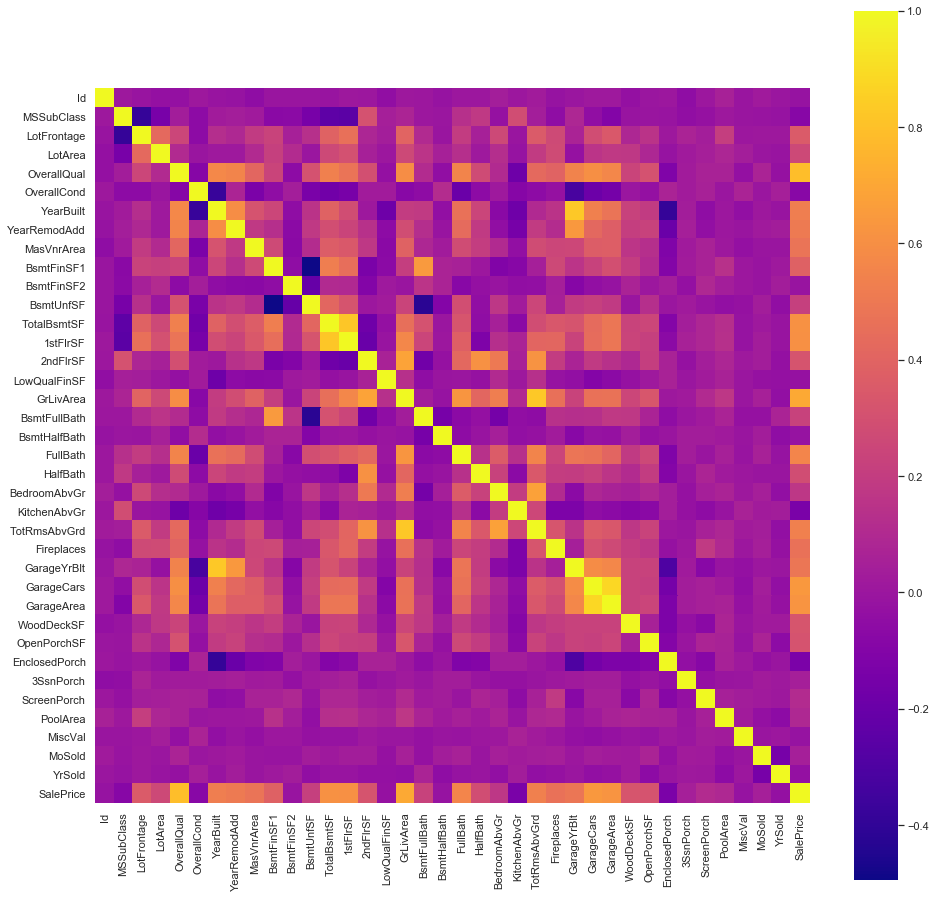

In [89]:
def corr_heatmap(df):
    corrmat = df.corr()
    fig = sns.heatmap(corrmat, square=True, cmap='plasma')
    return fig
plt.subplots(figsize=(16,16))
corr_heatmap(df)

---
- Pay attention to:
    - `TotalBsmtSF` and `1stFlrSF` - positive **correlation**
    - Garage related variables - more `GarageArea` more `GarageCars` - they give almost the same information
- Detecting redundant variables is great in our case
    - So we don't need to look at 80 variables
    
---
- `SalePrice` correlations - old friends:
    - `GrLivArea`, `ToalBsmtSF` and `OverallQual`
    - `YearBuilt`
    - A couple others - let's look at them with a more **focused** eye

# 5. Further analysis - working smart
## 5.5. Focused Correlation Heatmap
---

- Let's select the 10 **most correlated** variables to `SalePrice`

In [136]:
saleprice_corr = corrmat[['SalePrice']].abs()
saleprice_corr.head()

,SalePrice
Id,0.021917
MSSubClass,0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982


In [141]:
sorted_saleprice_corr = saleprice_corr.sort_values(by='SalePrice', ascending=False)
sorted_saleprice_corr.head()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431


In [264]:
k = 10 # number of highest correlations to SalePrice
top_saleprice_corr = sorted_saleprice_corr[:k]
top_saleprice_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [147]:
cols = list(top_saleprice_corr.index)
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

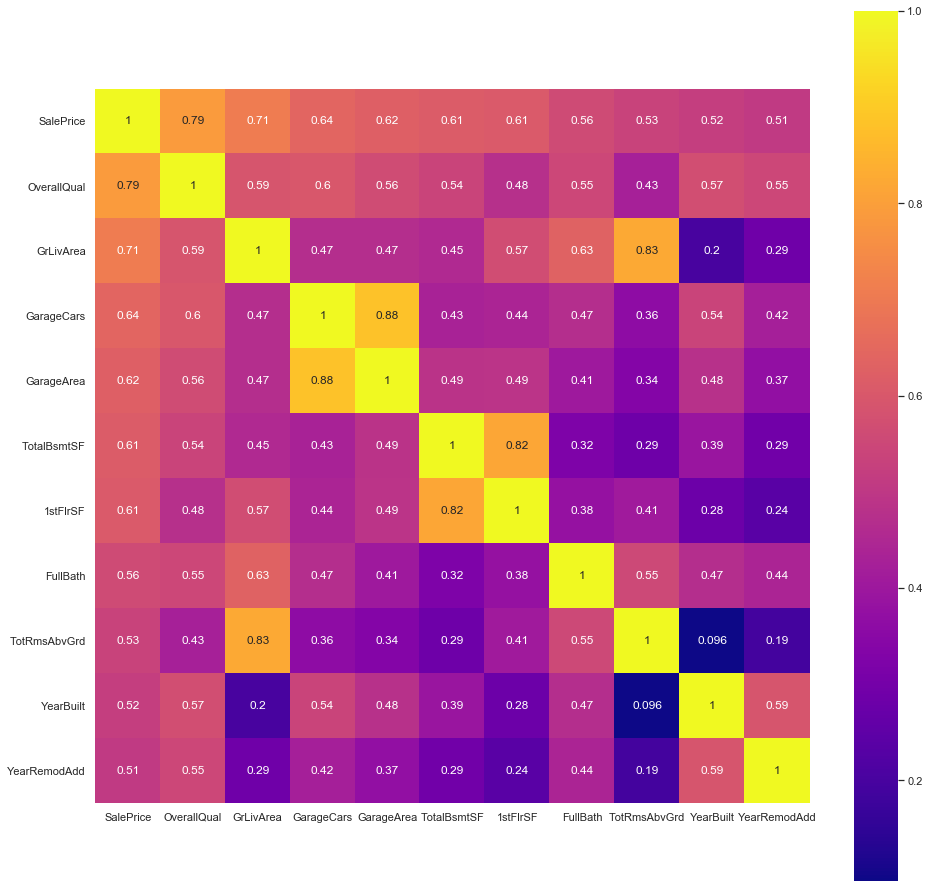

In [148]:
cm = df[cols].corr(method='pearson')
plt.subplots(figsize=(16, 16))
hm = sns.heatmap(cm, annot=True, square=True, yticklabels=cols, xticklabels=cols, cmap='plasma')
plt.show()

---
- Put it in a function for later use

In [149]:
def corr_heatmap(df, k=None):
    cm = df.corr()
    if k is not None:
        saleprice_corr = corrmat[['SalePrice']].abs()
        sorted_saleprice_corr = saleprice_corr.sort_values(by='SalePrice', ascending=False)
        top_saleprice_corr = sorted_saleprice_corr[:k]
        cols = list(top_saleprice_corr.index)
        cm = df[cols].corr(method='pearson')
    fig = sns.heatmap(cm, annot=True, square=True, yticklabels=cols, xticklabels=cols, cmap='plasma')
    return fig

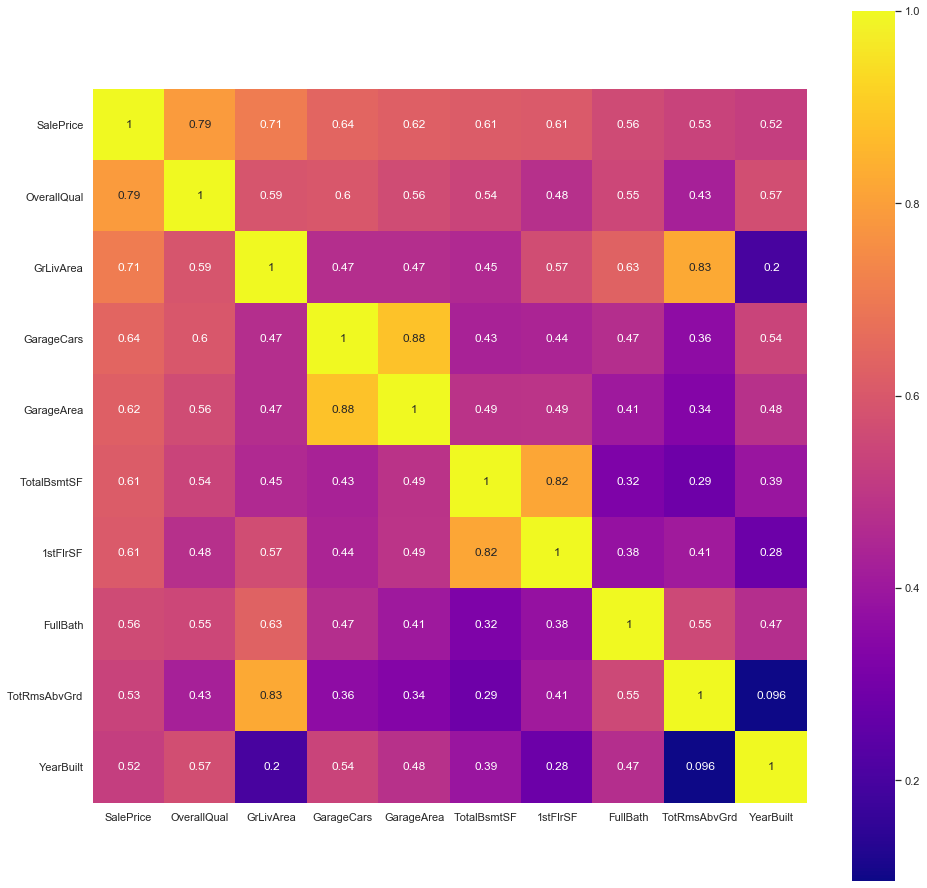

In [150]:
plt.subplots(figsize=(16,16))
corr_heatmap(df, k=10)

---
- Most **correlated** with `SalePrice`
    - `OverallQual`, `GrLivArea` and `TotalBsmtSF` - check!
    - `Garage` variables - redundant! We can keep just `GarageCars` (more correlated with `SalePrice`)
    - `TotalBsmtSF` and `1stFloor` - we'll keep both
    - `FullBath` - people like to take good showers, I guess.
    - `GrLivArea` and `TotRmsAbvGrd` - very **correlated**. We can just keep `GrLivArea`
    - `YearBuilt` - an overall good indicator

- We get to keep these variables:
    - `OverallQual`, `GrLivArea`, `TotalBsmtSF` and `YearBuilt` - our expectations were right!
    - `GarageCars` - seems to be a good indicator as well
    - `1stFlrSF` - some houses might not have a basement. 
    - `FullBath` - unrelated to our other variables


# 5. Further analysis - working smart
## 5.6. Investigating Correlated Variables - `PairPlot`
---
- We can visualize `Histograms` and `Scatter Plots` of all variables in just one plot - the `PairPlot`
- We can make use of `sns.pairplot`

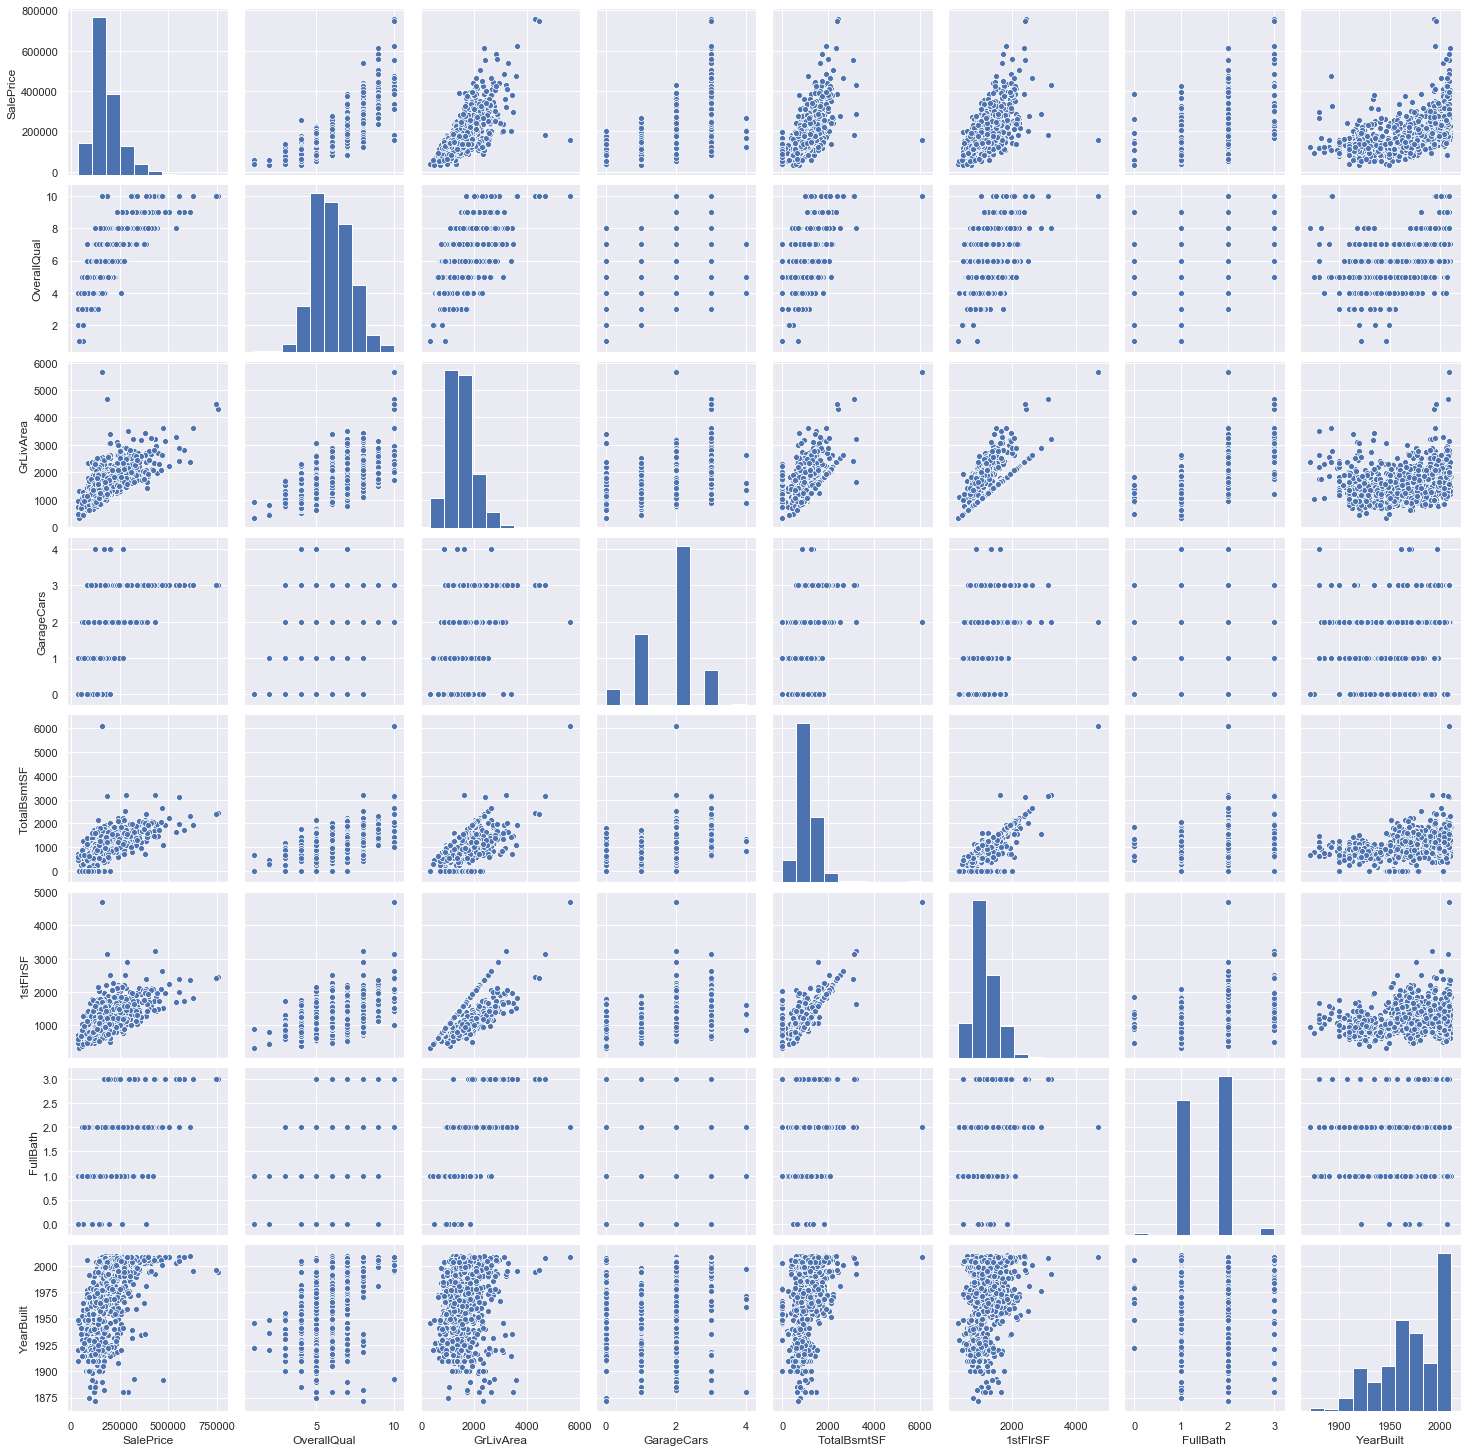

In [152]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

---
- Interesting finds:
    - `GrLivArea` and `TotalBsmtSF` - there are line dots, almost like a border. It is not expected to have basements larger than the 1st floor. It could also be an indicator of regulations for approved projects.
    - `1stFlrSF` and `TotalBsmtSF` - also seem to share the same relationship
    - `SalePrice` and `YearBuilt` - the cloud of dots seems to be giving more terrain for price. Seems that as we go forward, house prices are increasing. And faster at that!
    - We see that `OverallQual` and `YearBuilt` have an interesting relationship. Between 1932 and 1962 we don't see houses with `OverallQual` above 8. The Great Depression maybe?


# 5. Further analysis - working smart
## 5.7. Summary
---

- We can use **correlations** to find **interactions** between variables
- We used a `Heatmap` to visualize **correlations**
- We found new variables of interest:
    - `GarageCars`
    - `FullBath`
- We reforced that `1stFlrSF` might be a variable of interest
- We managed to pick a set of just 7 variables that might help explain our house prices! No need for 81!

# 6. Investigating wanted houses

<center>
<img src="https://files.realpython.com/media/SciPy-Tutorial_Watermarked_1.b9f391570601.jpg">    
    </center>

# 6. Investigating wanted houses
## 6.1. Introduction
---
- These are the variables we chose throughout our **selection** process

In [197]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

---
- Dividing our `Numerical` variables - we will need them for the `Scatter Plot`

In [238]:
numerical_cols = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']

---
- Dividing our `Categorical` variables - we will need them for `Boxplot`

In [237]:
categorical_cols = ['OverallQual', 'GarageCars', 'FullBath', 'YearBuilt']

# 6. Investigating wanted houses
## 6.2. Wanted house features - Requirements
---

(From homework)

We have a pretty rough idea on what our house should have.

For starters, we know that our `HeatingQC` (quality and condition) must be **excellent**, because we live in a cold country.
As for the `Heating` system we'd rather use gas, because we are so cold. So we want an `Heating` system that does uses any gas system.

But since we are a modern family we want `CentralAir` air conditioning.

To support our data analytics family we want our `Electrical` system to be flawless, so we definitely have to have "Standard Circuit Breakers".

In [239]:
wanted_features = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', ]
for f in wanted_features:
    feature_description(f)

Heating: Type of heating
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
HeatingQC: Heating quality and condition
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
CentralAir: Central air conditioning
       N	No
       Y	Yes
Electrical: Electrical system
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed


---
- Translating our wishes to **conditions**
- Our objective is to obtain a `pd.DataFrame` with only houses that follow our requirements

In [241]:
hq_cond = df['HeatingQC'] == 'Ex'
gasA_cond = df['Heating'] == 'GasA'
gasW_cond = df['Heating'] == 'GasW'
air_cond = df['CentralAir'] == 'Y'
cb_cond = df['Electrical'] == 'SBrkr'

---
- Getting our `pd.DataFrame` with wanted houses
- **All** requirements will be followed (`and` / `&`)
- We want **either** `GasA` **OR** (`|`) `GasW`

In [242]:
wanted_df = df[hq_cond & (gasA_cond | gasW_cond) & air_cond & cb_cond]
wanted_df[wanted_features].head()

,Heating,HeatingQC,CentralAir,Electrical
0,GasA,Ex,Y,SBrkr
1,GasA,Ex,Y,SBrkr
2,GasA,Ex,Y,SBrkr
4,GasA,Ex,Y,SBrkr
5,GasA,Ex,Y,SBrkr


---
- And also we want houses that do **NOT** follow our requirements - so we can **compare**
- The special character for this purpose is `~` (tilde)
- This time around we want **all** the houses that are **not** wanted (`True` becomes `False` and `False` becomes `True`)

In [243]:
unwanted_df = df[~(hq_cond & (gasA_cond | gasW_cond) & air_cond & cb_cond)]
unwanted_df[wanted_features].head()

,Heating,HeatingQC,CentralAir,Electrical
3,GasA,Gd,Y,SBrkr
8,GasA,Gd,Y,FuseF
12,GasA,TA,Y,SBrkr
14,GasA,TA,Y,SBrkr
15,GasA,Ex,Y,FuseA


# 6. Investigating wanted houses
## 6.3. Comparing `SalePrice` between wanted and unwanted houses
---
- We can **compare** the overall picture (**distribution**) using `Histogram` (`sns.displot`)

**`[OBSERVATION]`**: The first plot is always **blue**. In this case **Wanted = Orange**

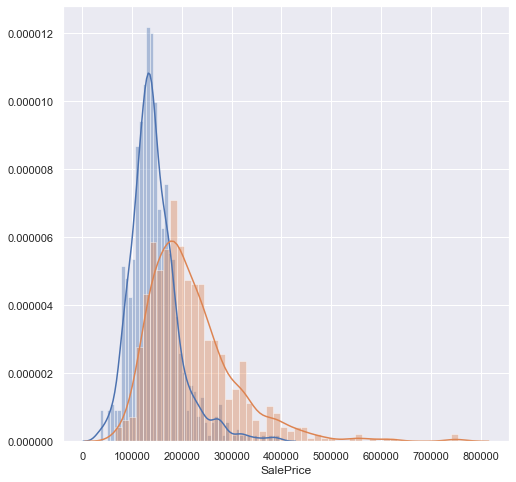

In [194]:
plt.subplots(figsize=(8, 8))
sns.distplot(unwanted_df['SalePrice'], bins=50)
sns.distplot(wanted_df['SalePrice'], bins=50)

---
**Conclusions**
- Looks like our wanted features make our house a **little bit pricier**
- And it looks like our wishes give rise to a **long tail** in the distribution
    - The few houses that are pricey (> 500000 dollars) are all present

# 6. Investigating wanted houses
## 6.4. Comparing house qualities - `BoxPlot`
---

- We now want to compare how our **selected** features fare against each other
- For house **qualities** we will use `Categorical` variables - better visualized with a `BoxPlot`
- We will compare them side-by-side

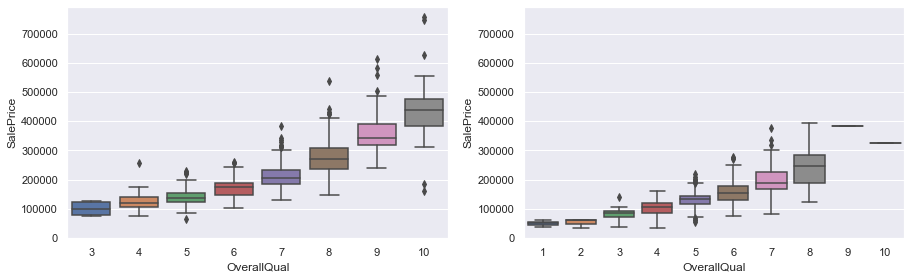

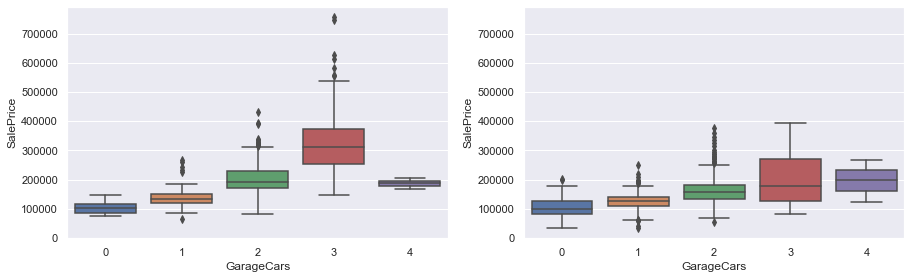

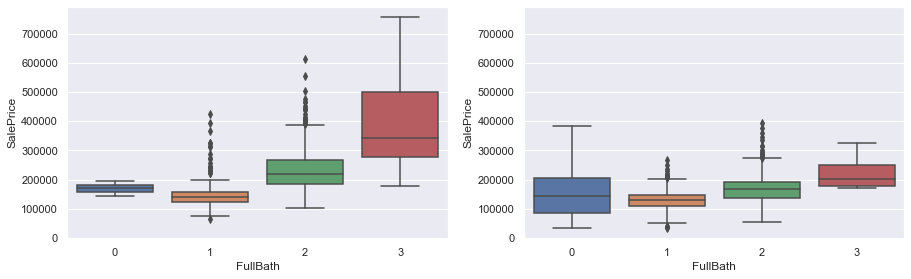

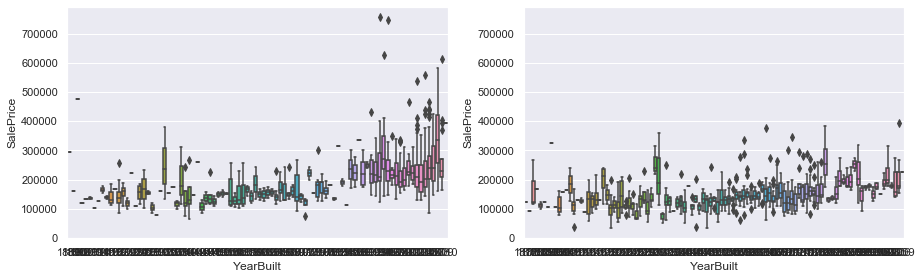

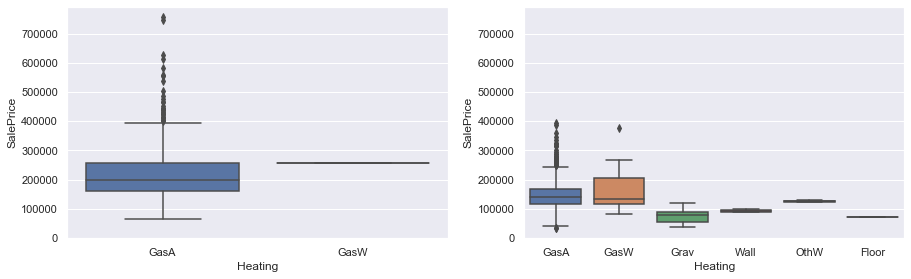

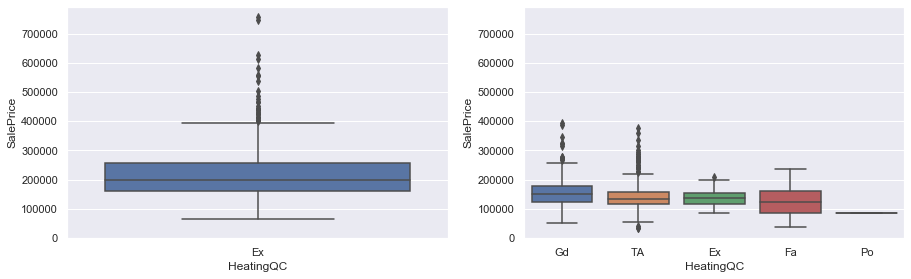

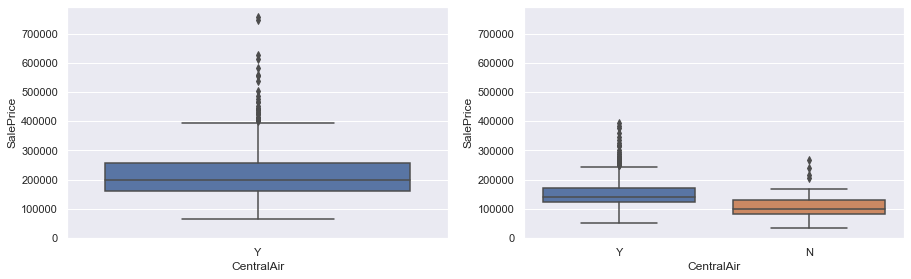

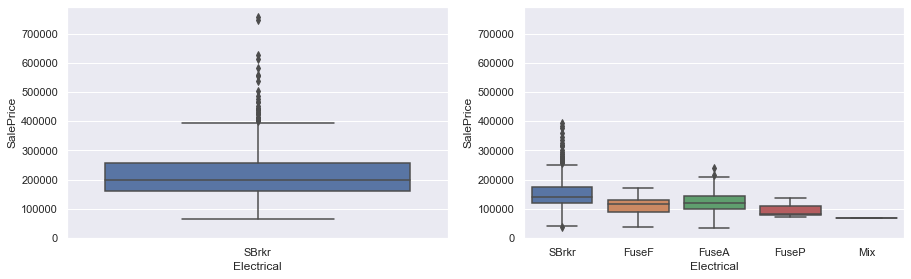

In [216]:
total_variables = len(categorical_cols) + len(wanted_features)
for i, c in enumerate(categorical_cols + wanted_features):
    plt.subplots(figsize=(15, 5*total_variables))
    
    ax1 = plt.subplot(len(cols), 2, 1)
    f = boxplot(wanted_df, c)
        
    ax2 = plt.subplot(len(cols), 2, 2, sharey=ax1)
    f = boxplot(unwanted_df, c)
    
plt.show()


---
**Conclusions**:
- `OverallQual` rises faster in `SalePrice` comparing to unwanted houses
- It is **unlikely** we will have 4 `GarageCars`, with our **conditions** and **requirements**
- `FullBath` (complete bathrooms) **greatly increase** our price - maybe we don't need that many bathrooms
- The `YearBuilt` shows **greater variation** comparing the same years, and an increased price
- `GasW` and `GasA` heating show an **overall increased price** - maybe we should be more enviromentally concerned!
- `HeatingQC` doesn't show much variation...
- In our type of house `CentralAir` is **more expensive** than in houses than we do not want
- Our `Electrical` system seems to be more expensive in both sets of houses. But this one is indispensible because we are an electrical engineer family.

# 6. Investigating wanted houses
## 6.5. Comparing house space - `Scatter`
---

- We now want to compare how our **space** features fare against each other
- For house **space** we will use `Numerical` variables - better visualized with a `Scatter Plot`
- We will compare them side-by-side

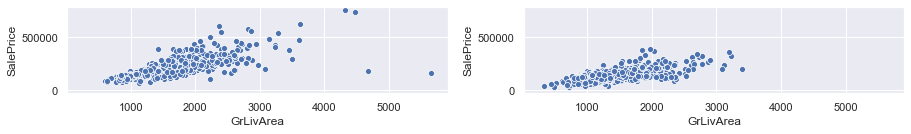

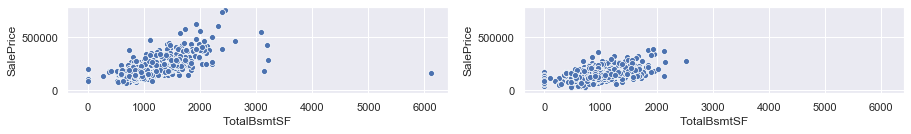

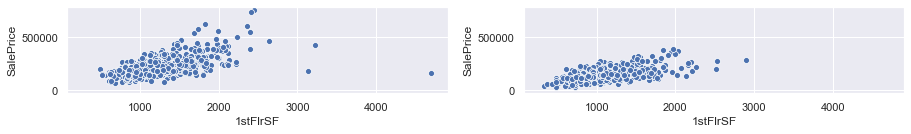

In [199]:
total_variables = len(numerical_cols) 
for i, c in enumerate(numerical_cols):
    plt.subplots(figsize=(15, 5*total_variables))
    
    ax1 = plt.subplot(len(cols), 2, 1)
    f = scatter(wanted_df, c)
        
    ax2 = plt.subplot(len(cols), 2, 2, sharex=ax1, sharey=ax1)
    f = scatter(unwanted_df, c)
    
plt.show()


---
**Conclusions**:
- It seems that our preferred houses have a **higher cost** per living space

# 6. Investigating wanted houses
## 6.6. Time to cut our losses
---
- We have a budget of **20000 dollars** and we can't go much above that
- `GarageCars`
    - We don't need more than 2 cars
    - We are still growing the family and the kids won't have cars for at least 20 years
    - **`[CONDITION]`**: `GarageCars <= 2`
- `FullBath`
    - We are an average family of 4, so 2 bathrooms will suffice 
    - **`[CONDITION]`**: `FullBath <= 2`
- `Heating`
    - After these conclusions we are not sure of the `Heating` system we want - let's see what's cheaper
- `HeatingQC`
    - We don't see much variation in the `SalePrice`
    - We'd rather have good or excellent `HeatingQC` 
    - **`[CONDITION]`**: `HeatingQC == 'Gd' | HeatingQC == 'Ex'`
- `CentralAir`
    - We can make do without `CentralAir`
    - **`[CONDITION]`**: `CentralAir == 'N'`
- `Electrical`
    - A good `Electrical` system is a must though - circuit breakers
    - **`[CONDITION]`**: `Electrical == 'SBrkr'`


---
- Translating our new **requirements** into a new `pd.DataFrame`

In [245]:
air_cond = df['CentralAir'] == 'N'
cb_cond = df['Electrical'] == 'SBrkr'
bath_cond = df['FullBath'] <= 2
cars_cond = df['GarageCars'] <= 2

In [250]:
wanted_df = df[(air_cond & cb_cond & bath_cond & cars_cond)]
print(len(wanted_df))
wanted_df[cols].head()

49


,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt
29,68500,4,520,1,520,520,1,1927
30,40000,4,1317,1,649,649,1,1920
52,110000,5,816,2,816,816,1,1963
61,101000,5,1111,1,530,581,1,1920
74,107400,3,1605,1,840,840,2,1915


In [251]:
unwanted_df = df[~(air_cond & cb_cond & bath_cond & cars_cond)]
unwanted_df[cols].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt
0,208500,7,1710,2,856,856,2,2003
1,181500,6,1262,2,1262,1262,2,1976
2,223500,7,1786,2,920,920,2,2001
3,140000,7,1717,3,756,961,1,1915
4,250000,8,2198,3,1145,1145,2,2000


In [225]:
len(wanted_df)

49

# 6. Investigating wanted houses
## 6.7. Comparing new house prices
---
- Repeating the same process as before

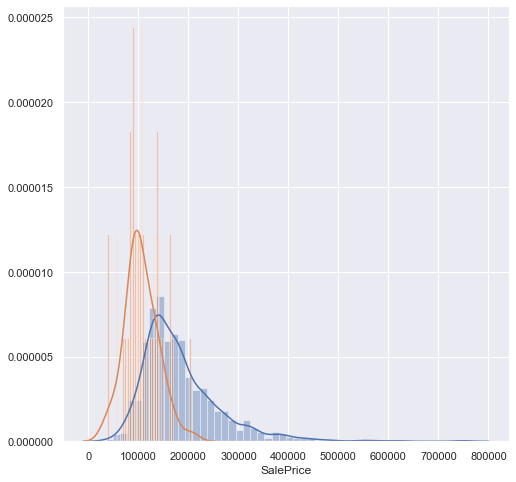

In [226]:
plt.subplots(figsize=(8, 8))
sns.distplot(unwanted_df['SalePrice'], bins=50)
sns.distplot(wanted_df['SalePrice'], bins=50)

---
**Conclusions**:
- Seems that our **wanted** houses became much **cheaper**!

# 6. Investigating wanted houses
## 6.8. Comparing new house qualities
---
- Repeating the same process as before - `BoxPlot`

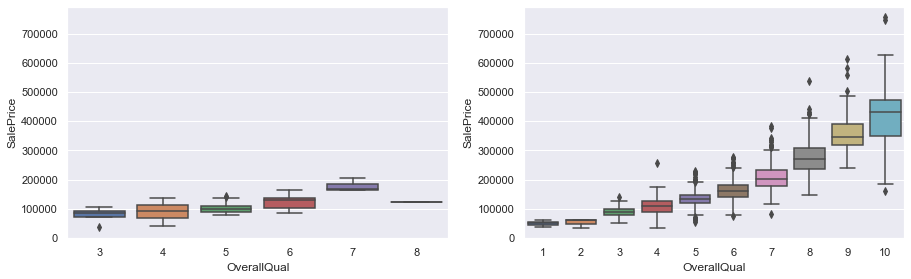

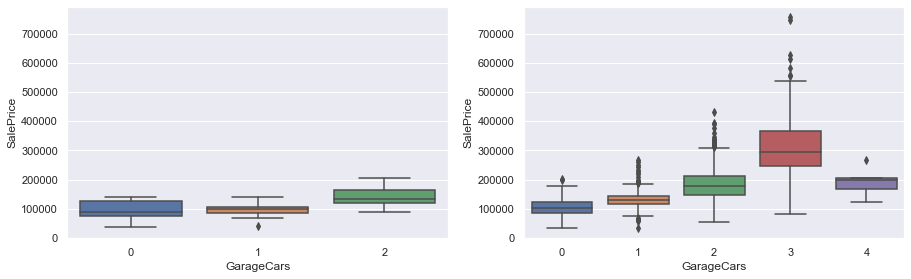

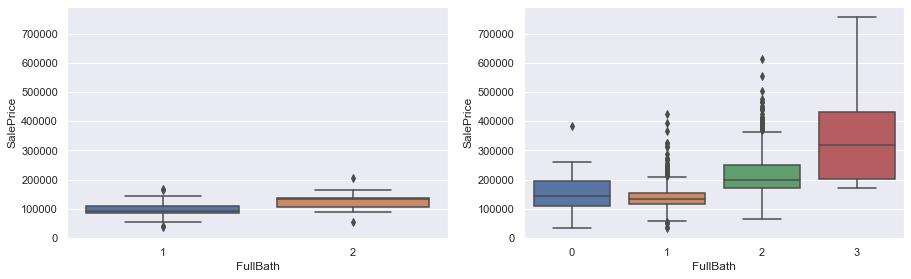

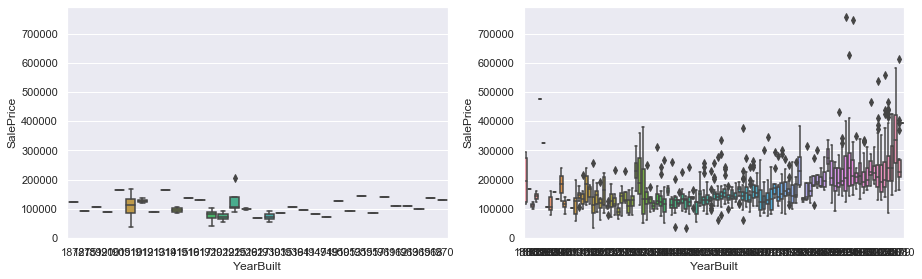

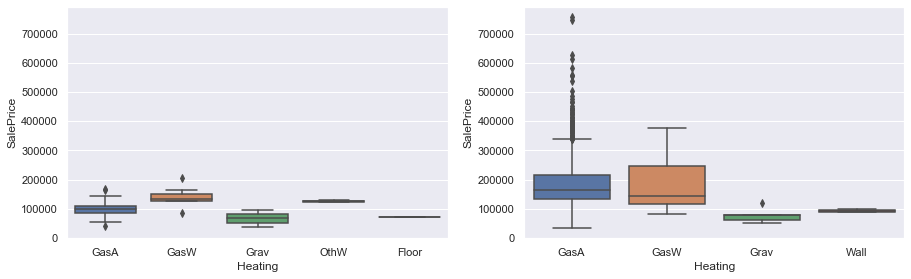

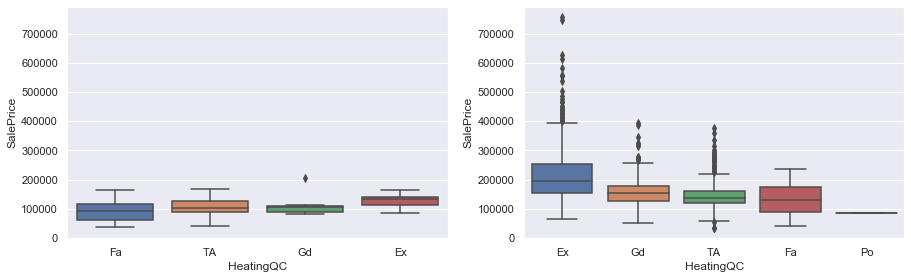

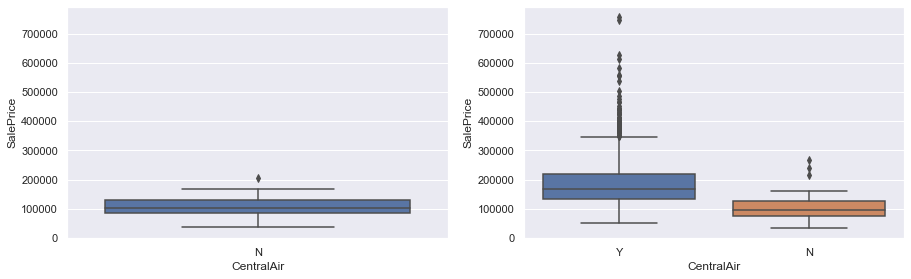

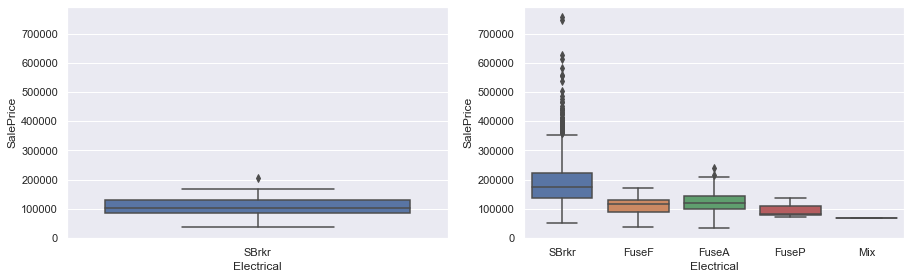

In [227]:
total_variables = len(categorical_cols) + len(wanted_features)
for i, c in enumerate(categorical_cols + wanted_features):
    plt.subplots(figsize=(15, 5*total_variables))
    
    ax1 = plt.subplot(len(cols), 2, 1)
    f = boxplot(wanted_df, c)
        
    ax2 = plt.subplot(len(cols), 2, 2, sharey=ax1)
    f = boxplot(unwanted_df, c)
    
plt.show()


---
**Conclusions**:
- `OverallQual` - wanted houses only go as far as an 8!
- `GarageCars` - within budget. Check!
- `FullBath` - within budget. Check!
- `YearBuilt` - looks like our last wanted house was built in 1970 - 50 years old! Ouch.
- `Heating` and `HeatingQC` - within budget. Check!
- `CentralAir` - maybe not that big of a problem after all.
- `Electrical` - within budget. All systems go!
    

# 6. Investigating wanted houses
## 6.9. Comparing new house space
---

- Let's compare how our **wanted** houses relate to the space

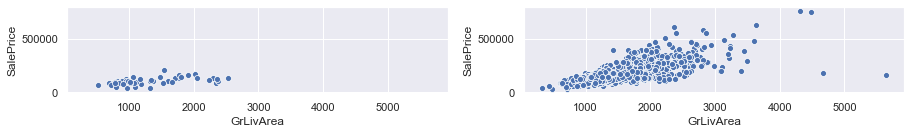

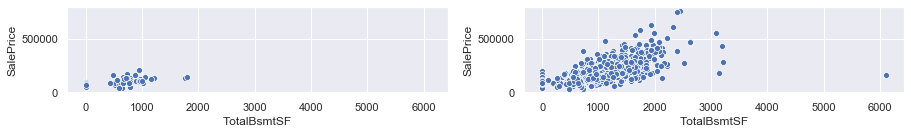

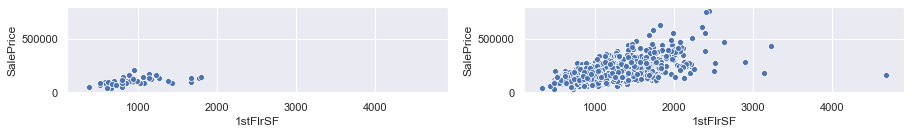

In [229]:
total_variables = len(numerical_cols) 
for i, c in enumerate(numerical_cols):
    plt.subplots(figsize=(15, 5*total_variables))
    
    ax1 = plt.subplot(len(cols), 2, 1)
    f = scatter(wanted_df, c)
        
    ax2 = plt.subplot(len(cols), 2, 2, sharex=ax1, sharey=ax1)
    f = scatter(unwanted_df, c)
    
plt.show()


---
**Conclusions**:
- Seems that space is not the greatest culprit of the price
- Doesn't show a linear relationship like before!
- Our requirements are what changes the price of the house

# 6. Investigating wanted houses
## 6.10. Settling on a wanted house
---

- It is time to schedule our first visit
- This house was chosen with care
- And we have a **numerical** understanding on how the market works - just in case anything funny happens
- We would like to capitalize on houses with an `OverallQual` above 7 - quality at a good price!

In [263]:
wanted_df.loc[wanted_df['OverallQual'] >= 7][cols + wanted_features + ['YearRemodAdd']]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,Heating,HeatingQC,CentralAir,Electrical,YearRemodAdd
275,205000,7,1548,2,952,952,2,1925,GasW,Gd,N,SBrkr,2007
735,163000,7,1768,2,880,880,1,1914,GasW,Fa,N,SBrkr,1970
974,167500,7,2019,2,728,1136,1,1910,GasA,TA,N,SBrkr,1993
1349,122000,8,2358,0,684,938,2,1872,OthW,Fa,N,SBrkr,1987


--- 
- We found a house just a little bit over budget
- `OverallQual` is 7
- Very old house - built in 1925, but **remodelled** in 2007

In [259]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [260]:
df.iloc[275].to_frame()

,275
Id,276
MSSubClass,50
MSZoning,RL
LotFrontage,55
LotArea,7264
Street,Pave
Alley,NaN
LotShape,Reg
LandContour,Lvl
Utilities,AllPub
